# Dinámica del Amor

El modelo describe el estado emotivo de Laura, Petrarca y la Inspración de Petrarca, al paso del tiempo.

<table>
    <tr>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Altichiero%2C_ritratto_di_Francesco_Petrarca.jpg/192px-Altichiero%2C_ritratto_di_Francesco_Petrarca.jpg" />
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Francesco_Petrarca01.jpg/200px-Francesco_Petrarca01.jpg" />
        </td>
    </tr>
</table>

In [1]:
# Para hacer experimentos numéricos importamos numpy
import numpy as np
#import pandas as pd

# y biblioteca para plotear
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# cómputo simbólico con sympy
from sympy import *
init_printing()

## Tasa de cambio del estado emotivo de Laura

$\frac{dL(t)}{dt}=-\alpha_{1}L(t)+R_{L}(P(t))+\beta_{1}A_{P}$

## Tasa de cambio del estado emotivo de Petrarca
$\frac{dP(t)}{dt}=-\alpha_{2}L(t)+R_{p}(L(t))+\beta_{2}\frac{A_{L}}{1+\delta Z(t)}$

## Tasa de cambio de la inspiración del Poeta
$\frac{dZ(t)}{dt}=-\alpha_{3}Z(t)+\beta_{3}P(t)$

## Reacción del Poeta a Laura
$R_{P}(L)=\gamma_{2}L$

## Reacción de la Bella al Poeta
$R_{L}(P)=\beta_{1}P\left(1-\left(\frac{P}{\gamma}\right)^{2}\right)$

$\alpha_{1}>\alpha_{2}>\alpha_{3}$

# Modelo computacional

El modelo se simplifica sustituyendo, en el sistema de ecuaciones de la tasa de cambio emotivo e inspiración, los argumentos de las reacciones de Laura y Petrarca al otro. De esta manera las únicas variables son $L$, $P$ y $Z$.

In [2]:
def dL(t):
    return -3.6 * L[t] + 1.2 * (P[t]*(1-P[t]**2) - 1)
    
def dP(t):
    return -1.2 * L[t] + 6 * L[t] + 12 / (1 + Z[t])

def dZ(t):
    return -0.12 * Z[t] + 12 * P[t]

In [3]:
years = 20
dt = 0.01
steps = int(years / dt)

L = np.zeros(steps)
P = np.zeros(steps)
Z = np.zeros(steps)

for t in range(steps-1):
    L[t+1] = L[t] + dt*dL(t)
    P[t+1] = P[t] + dt*dP(t)
    Z[t+1] = Z[t] + dt*dZ(t)    


Text(0,0.5,'estado emotivo')

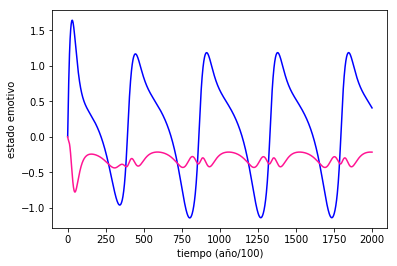

In [4]:
plt.plot(range(steps), P, color='blue')
#plt.plot(range(steps), Z/12.0, color='teal')
plt.plot(range(steps), L, color='deeppink')
plt.xlabel("tiempo (año/100)")
plt.ylabel("estado emotivo")

Text(0,0.5,'inspiración')

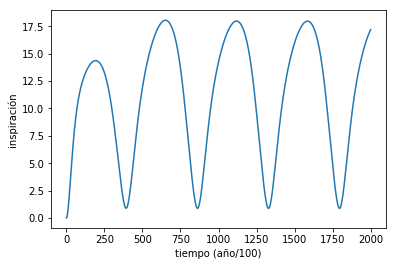

In [5]:
plt.plot(range(steps), Z)
plt.xlabel("tiempo (año/100)")
plt.ylabel("inspiración")

## Espacio fase

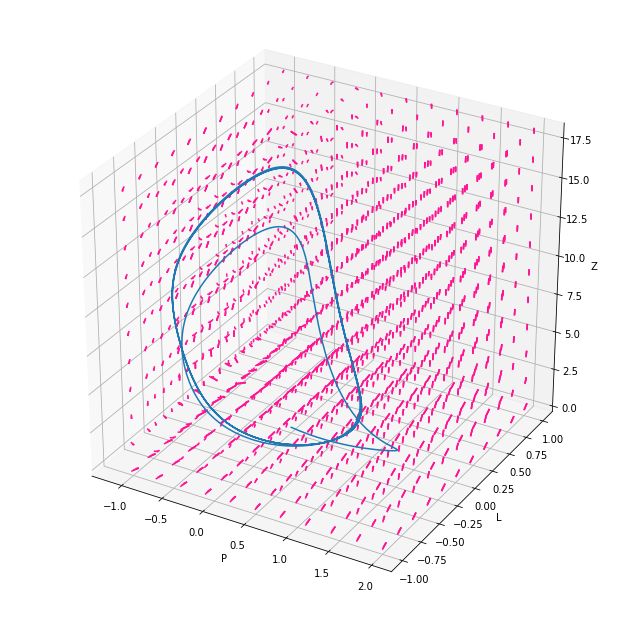

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11,11))
ax = fig.gca(projection='3d')

# Make the grid
l, p, z = np.meshgrid(np.linspace(-1, 2, 11),
                      np.linspace(-1, 1, 11),
                      np.linspace(0, 18, 11))

# Make the direction data for the arrows
u = -3.6 * l + 1.2 * (p*(1-p**2) - 1)
v = -1.2 * l + 6 * l + 12 / (1 + z)
w = -0.12 * z + 12 * p

ax.quiver(l, p, z, u, v, w, length=0.1, normalize=True, arrow_length_ratio=1, colors='deeppink')
ax.set_xlabel("P")
ax.set_ylabel("L")
ax.set_zlabel("Z")
ax.plot(P, L, Z)
plt.show()

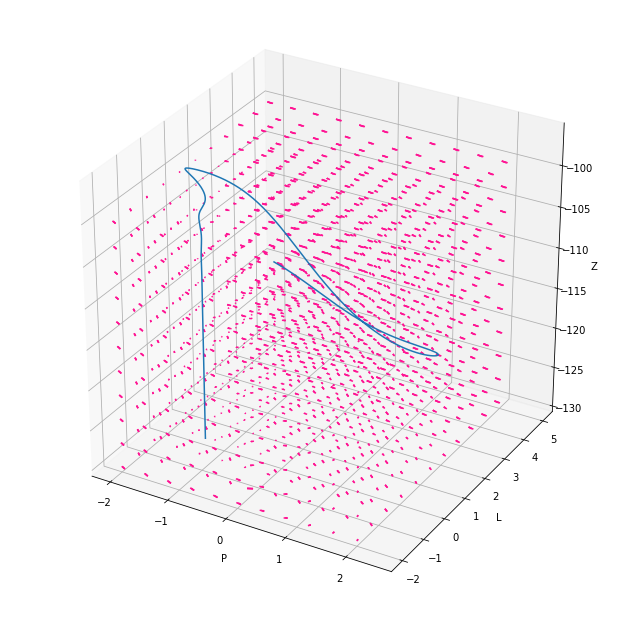

In [7]:
fig = plt.figure(figsize=(11,11))
ax = fig.gca(projection='3d')

# Make the grid
l, p, z = np.meshgrid(np.linspace(-2, 2, 11),
                      np.linspace(-2, 5, 11),
                      np.linspace(-130, -100, 11))

# Make the direction data for the arrows
u = -3.6 * l + 1.2 * (p*(1-p**2) - 1)
v = -1.2 * l + 6 * l + 12 / (1 + z)
w = -0.12 * z + 12 * p

ax.quiver(l, p, z, u, v, w, length=0.1, normalize=True, arrow_length_ratio=1, colors='deeppink')

years = 20
dt = 0.01
steps = int(years / dt)

L = np.zeros(steps)
P = np.zeros(steps)
Z = np.zeros(steps)

L[0]=5
P[0]=-2
Z[0]=-120

for t in range(steps-1):
    L[t+1] = L[t] + dt*dL(t)
    P[t+1] = P[t] + dt*dP(t)
    Z[t+1] = Z[t] + dt*dZ(t)    

ax.set_xlabel("P")
ax.set_ylabel("L")
ax.set_zlabel("Z")
ax.plot(P, L, Z)
plt.show()